In [57]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load csv
train_csv = pd.read_csv("Train.csv")
test_csv = pd.read_csv("Test.csv")
sample_csv = pd.read_csv("SampleSubmission.csv")

In [3]:
# get combined data
def combined_data():
    train_csv
    test_csv
    user_response = train_csv['Response']
    train_csv.drop(['Response'],1,inplace=True)
    
    combined = train_csv.append(test_csv)
    combined.reset_index(inplace=True)
    
    return combined

In [4]:
combined = combined_data()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [5]:
# to get the age from the year by subtracting the year from 2021
age_column = []
for i in combined.Year_of_Birth.values:
  x = 2021 - int(i)
  age_column.append(x)

combined['Age'] = age_column

In [6]:
combined["Disposable_Income"].fillna(combined.Disposable_Income.mean(), inplace=True)

In [7]:
combined.drop(["Year_of_Birth", "Date_Customer"],1,inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [8]:
cat_cols = ["Education_Level", "Marital_Status"]

In [9]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
combined = pd.get_dummies(data = combined, columns = cat_cols)
combined.head()

,index,ID,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,...,Education_Level_Master,Education_Level_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,ID_4A9AR6FQ,77504.4,1,1,56,2,1,1,4,...,0,0,0,0,1,0,0,0,0,0
1,1,ID_X28T3VEK,56784.0,0,1,17,6,5,1,8,...,0,0,0,0,0,0,0,1,0,0
2,2,ID_AWXARH57,103714.8,0,0,17,0,7,4,7,...,0,0,0,0,0,0,1,0,0,0
3,3,ID_FQVZHE81,46311.6,1,0,49,3,4,1,3,...,0,0,0,0,0,0,1,0,0,0
4,4,ID_QVLWGPRN,87486.0,0,0,59,1,3,7,9,...,0,0,0,0,0,1,0,0,0,0


In [10]:
combined.shape

(2240, 37)

In [ ]:
!pip uninstall scikit-learn

In [ ]:
!pip install scikit-learn==0.18.2

In [ ]:
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [45]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 114 kB/s  eta 0:00:01   |██▏                             | 5.3 MB 3.6 MB/s eta 0:00:20     |██▉                             | 6.6 MB 3.6 MB/s eta 0:00:20     |█████                           | 11.7 MB 3.6 MB/s eta 0:00:19     |███████▊                        | 18.4 MB 3.6 MB/s eta 0:00:17███                   | 31.2 MB 4.6 MB/s eta 0:00:10     |████████████████▏               | 38.6 MB 4.6 MB/s eta 0:00:09     |███████████████████▍            | 46.4 MB 4.6 MB/s eta 0:00:07:00:05
     |████████████████████████████████| 23.9 MB 40.3 MB/s eta 0:00:01     |██████████████████              | 13.4 MB 40.3 MB/s eta 0:00:01     |████████████████████▍           | 15.3 MB 40.3 MB/s eta 0:00:01


In [ ]:
import catboost as cat

In [16]:
catb = cat.CatBoostClassifier(iterations=10000, learning_rate= 0.03, eval_metric='F1')

In [23]:
catb.fit(X_train, y_train)

0:	learn: 0.0114286	total: 49.5ms	remaining: 8m 14s
1:	learn: 0.0773481	total: 52.2ms	remaining: 4m 20s
2:	learn: 0.1752577	total: 54.8ms	remaining: 3m 2s
3:	learn: 0.1780105	total: 57.2ms	remaining: 2m 22s
4:	learn: 0.2244898	total: 59.7ms	remaining: 1m 59s
5:	learn: 0.1684211	total: 62.1ms	remaining: 1m 43s
6:	learn: 0.1968912	total: 64.4ms	remaining: 1m 31s
7:	learn: 0.1968912	total: 66.7ms	remaining: 1m 23s
8:	learn: 0.2758621	total: 69.1ms	remaining: 1m 16s
9:	learn: 0.2512563	total: 71.9ms	remaining: 1m 11s
10:	learn: 0.3106796	total: 74.3ms	remaining: 1m 7s
11:	learn: 0.3412322	total: 76.4ms	remaining: 1m 3s
12:	learn: 0.3428571	total: 78.8ms	remaining: 1m
13:	learn: 0.3349282	total: 81.2ms	remaining: 57.9s
14:	learn: 0.3412322	total: 83.6ms	remaining: 55.6s
15:	learn: 0.3507109	total: 85.8ms	remaining: 53.5s
16:	learn: 0.3188406	total: 88.4ms	remaining: 51.9s
17:	learn: 0.2926829	total: 90.8ms	remaining: 50.3s
18:	learn: 0.2926829	total: 93ms	remaining: 48.9s
19:	learn: 0.30097

In [26]:
cat_pred = catb.predict(X_test)

In [27]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, cat_pred)
f1

0.5535714285714286

In [34]:
test_pred = catb.predict(test_data)

In [11]:
def get_data():
    global combined

    combined = combined.drop(["index", "ID"], 1)
    train_data = pd.DataFrame(combined.iloc[:1568])
    test_data = pd.DataFrame(combined.iloc[1568:])
    
    return train_data, test_data

In [12]:
train_data, test_data = get_data()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [13]:
df_train = pd.read_csv("Train.csv")
target = df_train.Response

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.86


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

In [30]:
y_pred = logreg.predict(test_data)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [31]:
sample_csv.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [32]:
output = y_pred
sample_csv["Response"] = output
sample_csv.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [35]:
output = test_pred
sample_csv["Response"] = output
sample_csv.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [62]:
sample_csv.to_csv('dsn21cat2.csv',index = False)

In [63]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 4.6 MB/s eta 0:00:01


In [ ]:
import lightgbm as lg

In [24]:
clf = lg.LGBMClassifier(num_iterations=10000, learning_rate=0.03)

In [25]:
clf.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=10000, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [26]:
# predict the results
y_pred=clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8896


In [28]:
lg_pred = clf.predict(test_data)

In [29]:
output = lg_pred
sample_csv["Response"] = output
sample_csv.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [30]:
sample_csv.to_csv('dsn21lgbm3.csv',index = False)

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [41]:
#sel = SelectFromModel(ExtraTreesClassifier(n_estimators = 100))
#sel.fit(X_train, y_train)

sel = ExtraTreesClassifier(n_estimators = 100)
sel.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [37]:
sel.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [38]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

17

In [40]:
print(sel.feature_importances_)

AttributeError: 'SelectFromModel' object has no attribute 'feature_importances_'

Feature: 0, Score: 0.04064
Feature: 1, Score: 0.01459
Feature: 2, Score: 0.02657
Feature: 3, Score: 0.06368
Feature: 4, Score: 0.03719
Feature: 5, Score: 0.03922
Feature: 6, Score: 0.04353
Feature: 7, Score: 0.04195
Feature: 8, Score: 0.04476
Feature: 9, Score: 0.04117
Feature: 10, Score: 0.05684
Feature: 11, Score: 0.03442
Feature: 12, Score: 0.04439
Feature: 13, Score: 0.04697
Feature: 14, Score: 0.04356
Feature: 15, Score: 0.05560
Feature: 16, Score: 0.02793
Feature: 17, Score: 0.05770
Feature: 18, Score: 0.04574
Feature: 19, Score: 0.01039
Feature: 20, Score: 0.00009
Feature: 21, Score: 0.04076
Feature: 22, Score: 0.00782
Feature: 23, Score: 0.00257
Feature: 24, Score: 0.01837
Feature: 25, Score: 0.01203
Feature: 26, Score: 0.01991
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00202
Feature: 29, Score: 0.01331
Feature: 30, Score: 0.02033
Feature: 31, Score: 0.01679
Feature: 32, Score: 0.01939
Feature: 33, Score: 0.00890
Feature: 34, Score: 0.00091


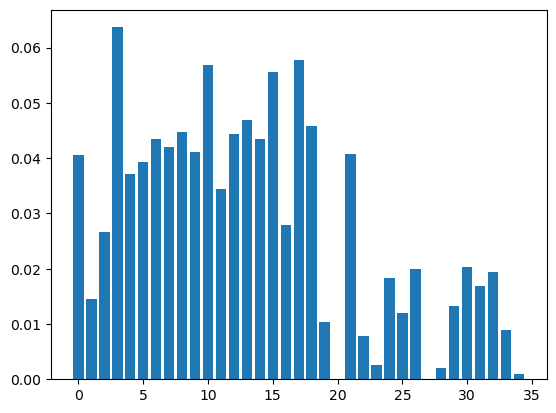

In [43]:
# get importance
importance = sel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
 from sklearn.feature_selection import SelectFromModel

In [45]:
model = SelectFromModel(sel, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(1097, 17)

In [47]:
X_test_new = model.transform(X_test)
X_test_new.shape

(471, 17)

In [48]:
test_new = model.transform(test_data)
test_new.shape

(672, 17)

In [49]:
clf1 = lg.LGBMClassifier(num_iterations=10000, learning_rate=0.03)

In [51]:
clf1.fit(X_new, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=10000, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [52]:
y_pred=clf1.predict(X_test_new)

In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8726


In [54]:
lg_pred = clf1.predict(test_new)

In [55]:
output = lg_pred
sample_csv["Response"] = output
sample_csv.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [56]:
sample_csv.to_csv('dsn21lgbm4fi.csv',index = False)

In [58]:
print("op")

op
